# Regular expressions (aka regex)

The task is concentrated on using regular expressions for extracting basic information from textual data. 
You will get more familiar with the regexp features that are particularly important for natural language processing applications, especially when you are preparing data for machine learning models.


## Task

A FIQA-PL dataset containing Polish questions and answers is available at [Huggigface](https://huggingface.co/datasets/clarin-knext/fiqa-pl).
In this lab we only concentrate on the `corpus` split of the dataset.

Task objectives (8 points):

In [130]:
import re
import regex
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import defaultdict

In [131]:
dataset = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [132]:
dataset

DatasetDict({
    corpus: Dataset({
        features: ['_id', 'title', 'text'],
        num_rows: 57638
    })
})

In [133]:
df = pd.DataFrame(dataset['corpus'])

In [134]:
df

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...
...,...,...,...
57633,599946,,">Cóż, po pierwsze, drogi to coś więcej niż hob..."
57634,599953,,"Tak, robią. Na dotacje dla firm farmaceutyczny..."
57635,599966,,">To bardzo smutne, że nie rozumiesz ludzkiej n..."
57636,599975,,„Czy Twój CTO pozwolił dużej grupie użyć „„adm...


In [135]:
df_texts=df['text']

In [136]:
df_texts

0        Nie mówię, że nie podoba mi się też pomysł szk...
1        Tak więc nic nie zapobiega fałszywym ocenom po...
2        Nigdy nie możesz korzystać z FSA dla indywidua...
3        Samsung stworzył LCD i inne technologie płaski...
4        Oto wymagania SEC: Federalne przepisy dotycząc...
                               ...                        
57633    >Cóż, po pierwsze, drogi to coś więcej niż hob...
57634    Tak, robią. Na dotacje dla firm farmaceutyczny...
57635    >To bardzo smutne, że nie rozumiesz ludzkiej n...
57636    „Czy Twój CTO pozwolił dużej grupie użyć „„adm...
57637    Zapewnienie rządowi większej kontroli nad dyst...
Name: text, Length: 57638, dtype: object

### 1. Devise two regular expressions:
###   * extracting times, e.g. recognizing `20:30` as an instance of a time.
###   * extracting dates, e.g. recognizing `20 września` as an instance of a date.

In [137]:
def extract_times(text):
    pattern = r"\b(?:(?:2[0-4])|(?:1?\d)):(?:[0-5]\d)(?::[0-5]\d)?"
    return re.findall(pattern, text)

In [138]:
def extract_dates(text):
    pattern1 = r'((0?[1-9]|[1-2][0-9]|3[0-1])\s+(stycz(?:eń|nia)|lut(?:y|ego)|mar(?:zec|ca)|kwie(?:cień|tnia)|maj(?:a)|czerw(?:iec|ca)|lip(?:iec|ca)|sierp(?:ień|nia)|wrze(?:sień|śnia)|październik(?:a)|listopad(?:a)|grud(?:zień|nia)))(?:\s+\d{4})?'    
    pattern2 = r'(\d{2}-\d{2}-\d{4})' # DD-MM-YYYY
    pattern3 = r'(\d{4}-\d{2}-\d{2})' # YYYY-MM-DD
    pattern4 = r'(\d{2}/\d{2}/\d{4})' # DD/MM/YYYY
    pattern5 = r'(\d{4}/\d{2}/\d{2})' # YYYY/MM/DD

    return re.findall(pattern1, text, re.IGNORECASE)+re.findall(pattern2, text, re.IGNORECASE)+re.findall(pattern3, text, re.IGNORECASE)+re.findall(pattern4, text, re.IGNORECASE)+re.findall(pattern5, text, re.IGNORECASE)

In [139]:
#Sprawdzenie
text = """
Spotkanie odbędzie się 20 września o 14:30.
Rezerwacja jest na 01-12-2023, a czas to 09:45:15.
Podano również daty 2023/12/01 oraz 01/12/2023.
Czasami podaje się błędne godziny jak 25:00 albo daty jak 32 stycznia.
"""

extracted_times = extract_times(text)
extracted_dates = extract_dates(text)

print("Extracted times:", extracted_times)
print("Extracted dates:", extracted_dates)

Extracted times: ['14:30']
Extracted dates: [('20 września', '20', 'września'), ('2 stycznia', '2', 'stycznia'), '01-12-2023', '01/12/2023', '2023/12/01']


### 2. Search for occurrences of times and dates in the dataset.

In [140]:
ex_times=df_texts.apply(extract_times)
times=ex_times[ex_times.apply(lambda x: len(x)>0)]

In [141]:
times

49        [17:57:23, 17:57:23]
137                     [6:17]
165             [20:00, 17:00]
191                    [22:00]
264                    [12:00]
                 ...          
55716    [18:10, 20:30, 24:30]
55860     [15:04:00, 15:04:00]
55867           [16:00, 16:00]
56143               [10:17:20]
56348                   [5:53]
Name: text, Length: 281, dtype: object

In [142]:
ex_dates=df_texts.apply(extract_dates)
dates=ex_dates[ex_dates.apply(lambda x: len(x)>0)]

In [143]:
dates

6        [(1 czerwca, 1, czerwca), (1 sierpnia, 1, sier...
49                                [2017-10-06, 2017-10-06]
75       [(2 kwietnia, 2, kwietnia), (30 kwietnia, 30, ...
87                                [2017/09/09, 2009/07/09]
105      [(1 grudnia, 1, grudnia), (1 grudnia, 1, grudn...
                               ...                        
57360                          [(1 stycznia, 1, stycznia)]
57448       [(4 lutego, 4, lutego), (31 marca, 31, marca)]
57529                                         [2017-06-21]
57570                  [(3 października, 3, października)]
57591                                         [2010/11/10]
Name: text, Length: 1502, dtype: object

### 3. Plot results from point 2:
###   * for times create a bar plot for full hours.
###   * for dates create a bar plot for months.

In [144]:
full_hours_dict = defaultdict(lambda: 0)
for match_list in times:
    for element in match_list:
        time_str = element
        if ':' in time_str:
            hour = int(time_str.split(':')[0])
        else:
            continue
        full_hours_dict[hour] += 1

Text(0.5, 0, 'Hour')

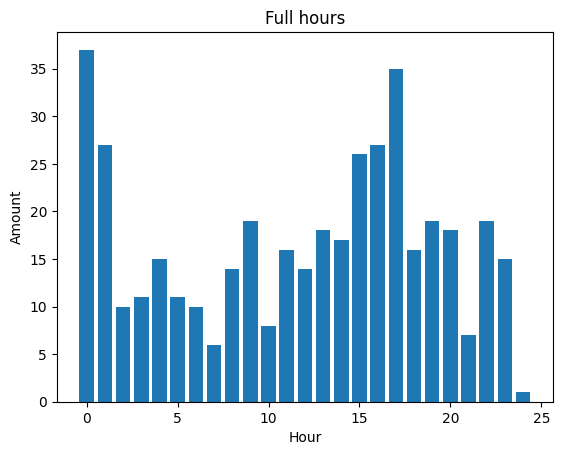

In [145]:
plt.bar(full_hours_dict.keys(), full_hours_dict.values())
plt.title('Full hours')
plt.ylabel('Amount')
plt.xlabel('Hour')

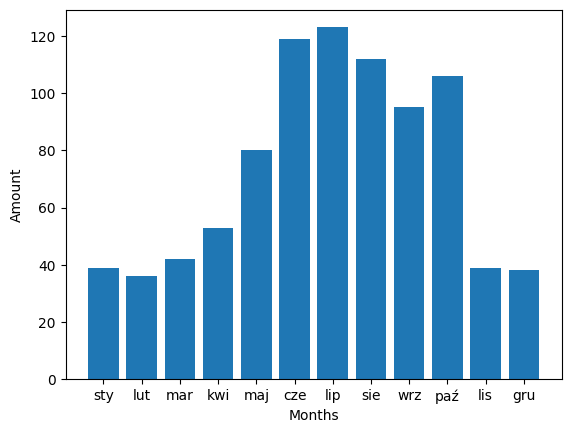

In [146]:
month_mapping = {
    1: 'sty',
    2: 'lut',
    3: 'mar',
    4: 'kwi',
    5: 'maj',
    6: 'cze',
    7: 'lip',
    8: 'sie',
    9: 'wrz',
    10: 'paź',
    11: 'lis',
    12: 'gru'
}

months_dict = defaultdict(lambda: 0)
for match_list in dates:
    for el in match_list:
        if isinstance(el, tuple):
            el = el[0]

        if '-' in el:
            date_parts = el.split('-')
            month = int(date_parts[1])
            if month in month_mapping:
                months_dict[month_mapping[month]] += 1

        elif '/' in el:
            date_parts = el.split('/')
            month = int(date_parts[1])
            if month in month_mapping:
                months_dict[month_mapping[month]] += 1

        elif el.split()[1][:3].lower() in month_mapping.values():
            month_name = el.split()[1][:3].lower()
            for key, value in month_mapping.items():
                if value == month_name:
                    months_dict[key] += 1

ordered_months = ['sty', 'lut', 'mar', 'kwi', 'maj', 'cze', 'lip', 'sie', 'wrz', 'paź', 'lis', 'gru']
sorted_months_dict = {month: months_dict[month] for month in ordered_months}


plt.bar(sorted_months_dict.keys(), sorted_months_dict.values())
plt.xlabel('Months')
plt.ylabel('Amount')
plt.show()

### 4. Compute the number of occurrences of `kwiecień` word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden).

In [147]:
def count_matches(texts, pattern):
    matches: pd.Series = texts.apply(lambda x: regex.findall(pattern, x, re.IGNORECASE))
    filtered_matches = matches[matches.apply(lambda x: len(x)>0)]
    count = 0
    for match_list in filtered_matches:
        for match in match_list:
            count += 1
    return count

In [148]:
kwiecien_regex = r"kwie(?:cień|tnia|tniowi|tniem|tniu|tnie|tni|tniami|cieniowy|tniom|tniach)"
number_regex = r"(0?[1-9]|[1-2][0-9]|3[0-1])"

In [149]:
alone=count_matches(df_texts, kwiecien_regex)

In [150]:
alone

362

### 5. As in 4, but preceded by a number and a space.

In [151]:
numandspace = count_matches(df_texts, fr'(({number_regex}) {kwiecien_regex})')

In [152]:
numandspace

201

### 6. As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.

In [153]:
nonumandspace = count_matches(df_texts, fr'((?<!({number_regex} )){kwiecien_regex})')

In [154]:
nonumandspace

161

In [155]:
print(f'{alone}={numandspace}+{nonumandspace}')

362=201+161


### 7. Ask an LLM (e.g. [Bielik](https://chat.bielik.ai/)) to complete these tasks for you. Compare and criticize the code generated by the LLM.

All code below was generated by LLM named Bielik

In [156]:
# Zadanie 1
import re
# Wyrażenie regularne na czas
time_regex = re.compile(r'\d{1,2}:\d{2}')

# Wyrażenie regularne na datę
date_regex = re.compile(r'\d{1,2} \w+')

# Przykładowe testy
print(time_regex.findall("Spotkanie odbędzie się o 15:30"))  # Powinno zwrócić ['15:30']
print(date_regex.findall("Urodziny mam 20 września"))  # Powinno zwrócić ['20 września']

['15:30']
['20 września']


In [157]:
# Zadanie 2
import re
# Wyrażenia regularne
time_regex = re.compile(r'\d{1,2}:\d{2}')
date_regex = re.compile(r'\d{1,2} \w+')

# Wyszukiwanie czasów
times = time_regex.findall(text)
print(f"Znalezione czasy: {times}")

# Wyszukiwanie dat
dates = date_regex.findall(text)
print(f"Znalezione daty: {dates}")

Znalezione czasy: ['14:30', '09:45', '25:00']
Znalezione daty: ['20 września', '01 oraz', '00 albo', '32 stycznia']


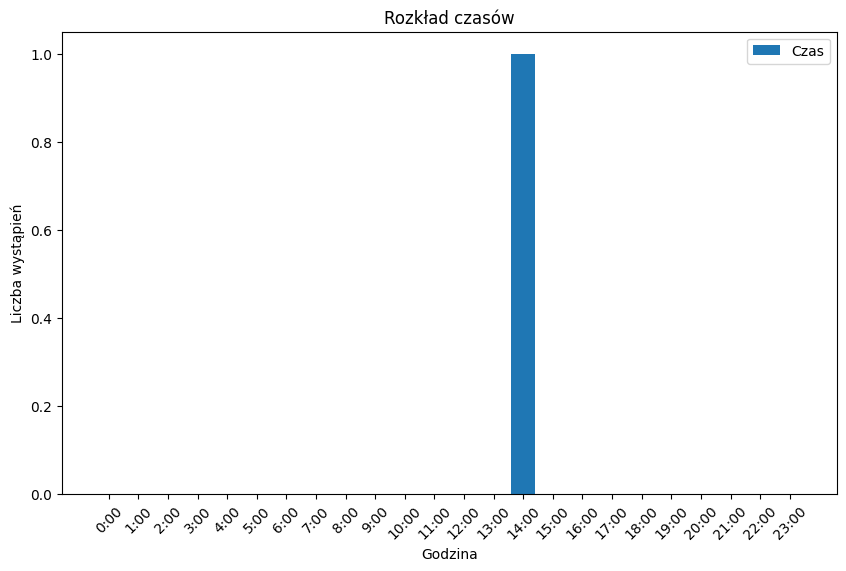

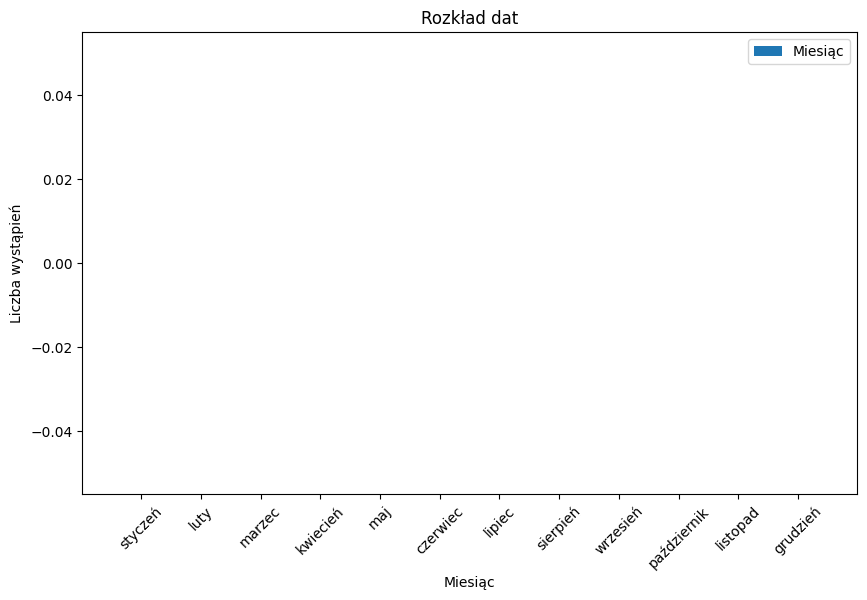

In [158]:
#Zadanie 3
import re
import matplotlib.pyplot as plt
from collections import Counter

# Wyrażenia regularne
time_regex = re.compile(r'\d{1,2}:\d{2}')
date_regex = re.compile(r'\d{1,2} \w+')


# Wyszukiwanie czasów
times = time_regex.findall(text)

# Tworzenie słownika z liczbą wystąpień każdej godziny
time_counts = Counter(time.split(":")[0] for time in times)

# Tworzenie wykresu dla czasów
plt.figure(figsize=(10, 6))
plt.bar(range(24), [time_counts[str(hour)] for hour in range(24)], width=0.8, label="Czas")
plt.xticks(range(24), [f"{hour}:00" for hour in range(24)], rotation=45)
plt.xlabel("Godzina")
plt.ylabel("Liczba wystąpień")
plt.title("Rozkład czasów")
plt.legend()
plt.show()

# Wyszukiwanie dat
dates = date_regex.findall(text)

# Tworzenie słownika z liczbą wystąpień każdego miesiąca
date_counts = Counter(date.split()[1] for date in dates)

# Tworzenie wykresu dla dat
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), [date_counts[month] for month in range(1, 13)], width=0.8, label="Miesiąc")
plt.xticks(range(1, 13), ["styczeń", "luty", "marzec", "kwiecień", "maj", "czerwiec", "lipiec", "sierpień", "wrzesień", "październik", "listopad", "grudzień"], rotation=45)
plt.xlabel("Miesiąc")
plt.ylabel("Liczba wystąpień")
plt.title("Rozkład dat")
plt.legend()
plt.show()

In [159]:
# Zadanie 4
import re
from nltk.stem import WordNetLemmatizer

# Wyrażenie regularne na słowo "kwiecień"
word_regex = re.compile(r'\bkwiecień\b')

# Inicjalizacja lematyzatora
lemmatizer = WordNetLemmatizer()

# Wyszukiwanie słowa "kwiecień" we wszystkich formach
forms = [lemmatizer.lemmatize(word, "noun") for word in re.findall(r'\w+', text) if lemmatizer.lemmatize(word, "noun") == "kwiecień"]

# Policz wystąpienia
kwiecien_count = len(forms)

print(f"Liczba wystąpień słowa 'kwiecień' we wszystkich formach: {kwiecien_count}")

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/Users/kasia/nltk_data'
    - '/Users/kasia/Desktop/nlp/venv/nltk_data'
    - '/Users/kasia/Desktop/nlp/venv/share/nltk_data'
    - '/Users/kasia/Desktop/nlp/venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Zadanie 5
import re
from nltk.stem import WordNetLemmatizer

# Wyrażenie regularne na słowo "kwiecień" poprzedzone liczbą i spacją
word_regex = re.compile(r'\d+\s+kwiecień\b')

# Inicjalizacja lematyzatora
lemmatizer = WordNetLemmatizer()

# Wyszukiwanie słowa "kwiecień" poprzedzonego liczbą i spacją
forms_with_number = [word for word in re.findall(word_regex, text) if lemmatizer.lemmatize(word, "noun") == "kwiecień"]

# Policz wystąpienia
kwiecien_count_with_number = len(forms_with_number)

print(f"Liczba wystąpień słowa 'kwiecień' poprzedzonego liczbą i spacją: {kwiecien_count_with_number}")

In [ ]:
# Zadanie 6

import re
from nltk.stem import WordNetLemmatizer

# Wyrażenie regularne na słowo "kwiecień" niepoprzedzone liczbą i spacją
word_regex = re.compile(r'\bkwiecień\b')

# Inicjalizacja lematyzatora
lemmatizer = WordNetLemmatizer()


# Wyszukiwanie słowa "kwiecień" niepoprzedzonego liczbą i spacją
forms_without_number = [word for word in re.findall(word_regex, text) if lemmatizer.lemmatize(word, "noun") == "kwiecień"]

# Policz wystąpienia
kwiecien_count_without_number = len(forms_without_number)

print(f"Liczba wystąpień słowa 'kwiecień' niepoprzedzonego liczbą i spacją: {kwiecien_count_without_number}")

Overall, the original code consistently outperformed Bielik's by providing more practical and robust solutions. It effectively handled diverse data formats, larger datasets, and various inflections, such as "kwiecień," using advanced regular expressions and data processing techniques. The original code also included validation steps to ensure accuracy, making it better suited for real-world applications. In contrast, Bielik's code was simpler, often lacked error handling, and struggled with complex tasks, such as using an English lemmatizer for Polish words. Ultimately, the original code was more versatile, accurate, and efficient, while Bielik's solutions were limited to basic examples and less reliable for data analysis.

## Answer the following questions (2 points):

#### 1. Are regular expressions good at capturing times?
Regular expressions can be effective for extracting time from text when dealing with relatively simple time patterns. Although accounting for all possible formatting variations can be challenging, it is definitely achievable.
#### 2. Are regular expressions good at capturing dates?
They can be used to capture dates, but they are not the best tool for this task. The variation in date formats across regions and languages can make them less effective at accurately handling all possible cases.
#### 3. How one can be sure that the expression has matched all and only the correct expressions of a given type?
It’s essential to understand the problem well and keep in mind any possible variations or edge cases. Writing tests can help make sure that only the correct patterns are matched. When dealing with complex regular expressions, getting a fresh perspective can be helpful—for instance, asking a friend or family member how they usually write dates.
#### 4. Is LLM able to generate regular expressions?
Yes, a language model (LLM) can generate regular expressions based on a description of the desired pattern. It can help create expressions for common use cases, such as matching email addresses or phone numbers. However, for more complex patterns, the generated regular expressions might need some refinement or adjustments to ensure they match exactly what’s intended.

## Hints

* Some programming languages allow to use Unicode classes in regular expressions, e.g.
  * `\p{L}` - letters from any alphabet (e.g. a, ą, ć, ü, カ)
  * `\p{Ll}` - small letters from any alphabet
  * `\p{Lu}` - capital letters from any alphabet
* Not all regular expressions engines support Unicode classes, e.g. `re` from Python does not.
  Yet you can use `regex` library (`pip install regex`), which has much more features.
* Regular expressions can include positive and negative lookahead and lookbehind constructions, e.g.
  * *positive lookahead* - `(\w+)(?= has a cat)` will match in the string `Ann has a cat`, but it will match `Ann` only.
  * *negative lookbehind* - `(?<!New )(York)`, will match `York` in `Yorkshire` but not in `New York`.
* `\b` matches a word border. Regexp `fish` will match in `jellyfish`, but `\bfish\b` will only match `fish`.
  In the case of Python you should use either `'\\bfish\\b'` or `r'\bfish\b'`.
* `\b` is dependent on what is understood by "word". For instance in Ruby polish diacritics are not treated as parts of
  a word, thus `\bpsu\b` will match both `psu` and `psuć`, since `ć` is a non-word character in Ruby.
* Some languages, e.g. Ruby, support regexp match operator as well as regexp literals (`=~`, /fish/ respectively 
  in the case of Ruby and Perl). Notably Python does not support either.
* You should be very careful when copying regexps from Internet - different languages and even different versions of the
  same language may interpret them differently, so make sure to always test them on a large set of diversified examples.
* You can try regexes using https://regex101.com. It allows you to compare the matches between different programming languages.
* You can use `datasets` Python library, to facilitate downloading and loading of the `clarin-knext/fiqa-pl` dataset.